In [89]:
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [90]:
def intToHex(number, width):
  zero_padding = width // 4

  if (number < 0):
    mask = (1 << width) - 1
    complement = (abs(number) ^ mask)
    number = complement + 1

  return f"{number:0{zero_padding}X}"

In [91]:
def calcMatrixVectorMultiplication(matrix_A, matrix_B):
  return np.dot(matrix_A, matrix_B)

In [92]:
def transposeMatrix(matrix):
  return np.transpose(matrix)

In [93]:
def genRandomIntMatrix(matrix_size, lowest_number, largest_number):
  return np.random.randint(lowest_number, largest_number, (matrix_size, matrix_size))

In [94]:
def skew_matrix(matrix):
  rows = len(matrix)
  cols = 2*rows - 1

  skewed = np.zeros((rows, cols), dtype=int)

  for r in range(rows):
      for c in range(rows):
          skewed[r][c + r] = matrix[r][c]

  return skewed

In [95]:
def genRandomMatrices(sample_param):
  matrix_A = genRandomIntMatrix(
    sample_param["matrix_size"],
    sample_param["lowest_number"],
    sample_param["largest_number"]
  )

  matrix_B = genRandomIntMatrix(
    sample_param["matrix_size"],
    sample_param["lowest_number"],
    sample_param["largest_number"]
  )

  matrix_C = calcMatrixVectorMultiplication(matrix_A, matrix_B)

  return [matrix_A, transposeMatrix(matrix_B), matrix_C]

In [96]:
def convertSampleToHex(sample, data_width):
  hex_samples = []

  for index, matrix in enumerate(sample):
    if (index < 2):
      matrix_to_process = skew_matrix(matrix)
      width = data_width

    else:
      matrix_to_process = matrix
      width = 2*data_width

    hex_matrix = np.array([[intToHex(int(num), width) for num in row] for row in matrix_to_process])
    hex_samples.append(hex_matrix)

  return hex_samples

In [97]:
def convertParamsToHex(params):
  hex_param = []

  for value in list(params.values()):
    hex_param.append(intToHex(value, 8))

  return hex_param

In [98]:
def genSamples(params):
  samples = []
  hex_samples_list = []

  samples.append(list(params.values()))
  hex_samples_list.append(convertParamsToHex(params))

  for i in range(params["num_samples"]):
    matrices = genRandomMatrices(params)
    samples.append(matrices)
    hex_samples_list.append(convertSampleToHex(matrices, params["data_width"]))

  return (samples, hex_samples_list)

In [99]:
def writeSampleFile(file_name, samples):
  folder_path = "../SystolicArray.srcs/sim_1/new/"
  file_path = folder_path + file_name

  with open(file_path, "w") as file:
    #matrix_size = samples[0][3]

    file.write("// Configuracao do Teste \n")
    row_str = " ".join(map(str, samples[0]))
    file.write(row_str + "\n\n")

    for i in range(1, len(samples)):
      file.write("// Caso de Teste " + str(i) + "\n")
      for matrix in samples[i]:
        for row in matrix:
          row_str = " ".join(map(str, row)) if isinstance(row, (list, tuple, np.ndarray)) else str(row)
          file.write(row_str + "\n")
        file.write("\n")
    
    file.close()

In [100]:
def convertConvolutionToSamples(img, kernel, params):
  samples = []
  hex_samples = []
  
  img_width, img_height = img.shape
  kernel_width, kernel_height = kernel.shape
  output_width = img_width - kernel_width + 1
  output_height = img_height - kernel_height + 1

  samples.append(list(params.values()))
  hex_samples.append(convertParamsToHex(params))

  for y in range(output_height):
    for x in range(output_width):
      img_slice = img[y:y+kernel_height, x:x+kernel_width]
      output_slice = calcMatrixVectorMultiplication(img_slice, kernel)
      matrices = [img_slice.tolist(), kernel.tolist(), output_slice]
      samples.append(matrices)
      hex_samples.append(convertSampleToHex(matrices, params["data_width"]))

    return (samples, hex_samples)

In [101]:
def printSample(sample, index):
  matrix_size = int(sample[0][0])
  matrix_A = sample[index][0]
  matrix_B = sample[index][1]

  print("\n--- Matrix A ---")  
  for i in range(matrix_size):
    print(matrix_A[i])

  print("\n--- Matrix B ---")  
  for j in range(matrix_size):
    print(matrix_A[j])

In [102]:
'''TEST_PARAMS = {
  "matrix_size": 3,
  "data_width": 8,
  "num_samples": 8,
  "lowest_number": 1,
  "largest_number": 9,
}

samples, hex_samples = genSamples(TEST_PARAMS)

writeSampleFile("test_samples.mem", hex_samples)
writeSampleFile("preview_samples.txt", samples)'''

'TEST_PARAMS = {\n  "matrix_size": 3,\n  "data_width": 8,\n  "num_samples": 8,\n  "lowest_number": 1,\n  "largest_number": 9,\n}\n\nsamples, hex_samples = genSamples(TEST_PARAMS)\n\nwriteSampleFile("test_samples.mem", hex_samples)\nwriteSampleFile("preview_samples.txt", samples)'

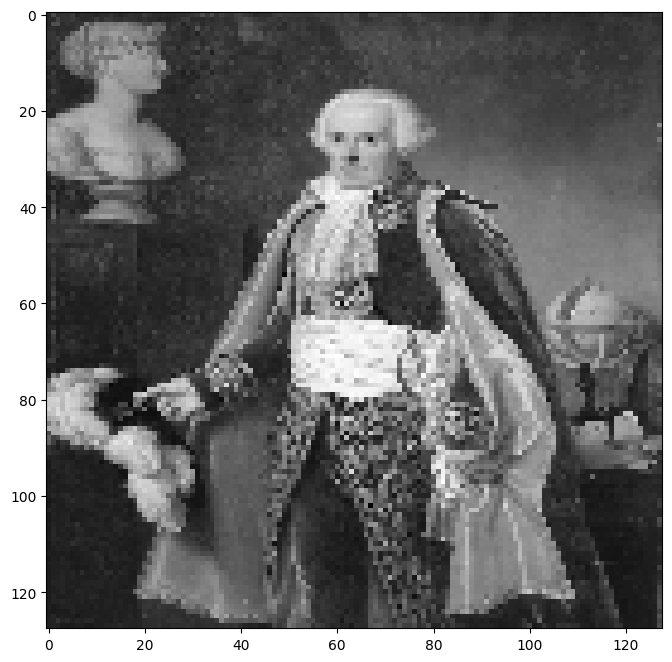

In [ ]:
TEST_PARAMS = {
  "matrix_size": 3,
  "data_width": 8,
  "num_samples": 8,
  "lowest_number": 1,
  "largest_number": 9,
}

size = 128
path = "./images/Laplace.jpg"
gray_img = image.load_img(
  path,
  target_size=(size, size),
  color_mode="grayscale",
)

input_img = img_to_array(gray_img).reshape(size, size)

kernel = np.array([
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1]
])

plt.figure(figsize=(8,8))
plt.imshow(input_img, cmap='gray')

samples, hex_samples = convertConvolutionToSamples(input_img, kernel, TEST_PARAMS) 

writeSampleFile("test_samples.mem", hex_samples)
writeSampleFile("preview_samples.txt", samples)

In [104]:
printSample(samples, 1)


--- Matrix A ---
[42.0, 73.0, 50.0]
[44.0, 45.0, 67.0]
[42.0, 76.0, 78.0]

--- Matrix B ---
[42.0, 73.0, 50.0]
[44.0, 45.0, 67.0]
[42.0, 76.0, 78.0]
